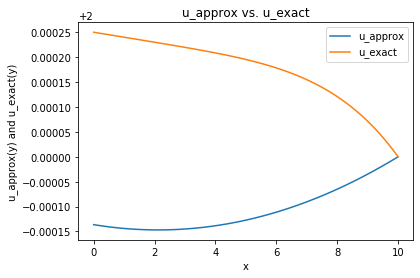

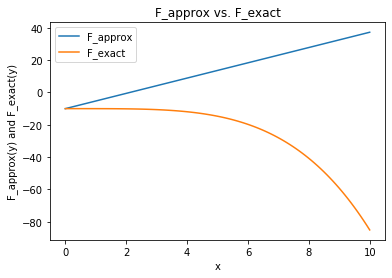

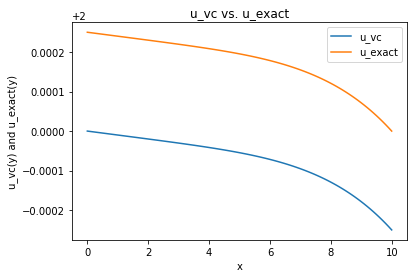

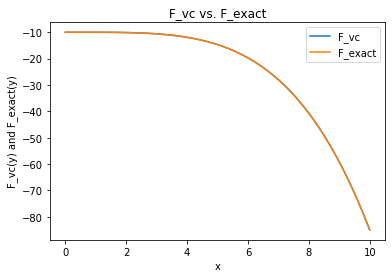

In [46]:
### Benjamin Tollison ###

import numpy as np
import matplotlib.pyplot as plt

### problem 5 ###
E = 1.0 * 10**7
A = 0.1
EA = E * A
L = 10.0
g = 0.03
P = -10.0
# Creating the functions
def u_exact(x):
    u =  (1/EA) * (P * (x-L) + (1/20) * g * (L**5 - x**5)) + 2
    return u, 'u_exact'
def F_exact(x):
    return P - .25 * g * x**4, 'F_exact'
def u_approx(x):
    u = 2 + (P / EA) * (x-L) + (3 / (4 * EA)) * (((P * L + P) / L**2) + g * L**2 * ((L/6)-(1/4))) * (x**2 - L**2)
    return u, 'u_approx'
def F_approx(x):
    F = P + (3/2) * x * (((P*L + P) / L**2) + g * L**2 *((L/6) - (1/4)))
    return F, 'F_approx'
def u_variationally_consistant(x):
    u =  (1 / EA) * (P * x - (1/20) * g * x**5) + 2
    return u, 'u_vc'
def F_variationally_consistant(x):
    return P - (1/4) * g * x**4, 'F_vc'
#creating a function to plot all the graphs to compare them
def plot(function1, function2):
    x_values = np.linspace(0, L, 100)
    plt.title('{} vs. {}'.format(function1(1)[1], function2(1)[1]))
    plt.plot(x_values, function1(x_values)[0],label = '{}'.format(function1(1)[1]))
    plt.plot(x_values, function2(x_values)[0],label = '{}'.format(function2(1)[1]))
    plt.xlabel('x')
    plt.legend()
    plt.ylabel('{}(y) and {}(y)'.format(function1(1)[1], function2(1)[1]))
    plt.show()
#comparing the exact to fem
plot(u_approx,u_exact)
plot(F_approx,F_exact)
#comparing Exact to Variationally_Consistant
plot(u_variationally_consistant,u_exact)
plot(F_variationally_consistant,F_exact)

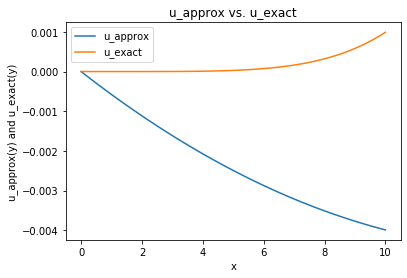

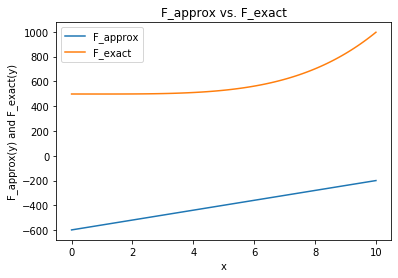

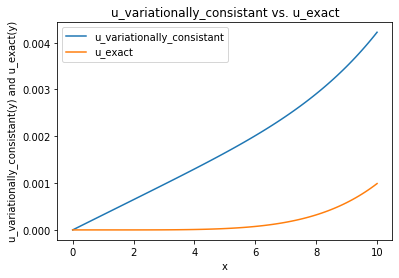

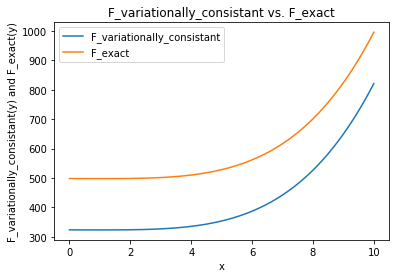

In [47]:
### Problem 6 ###
L = 10
E = 10**7
A = 0.1
EA = E * A
def F_exact(x):
    return (200/L**3) * (.25 * (x**4 +L**4) - x -L) , 'F_exact'
def u_exact(x):
    return (10/(EA * L**3)) * (x**5 - 10 * x**2), 'u_exact'
def u_approx(x):
    return (200/(EA*L**3)) * (-2990*x + (199/2)* x**2), 'u_approx'
def F_approx(x):
    return (200/(L**3)) * (-2990 + (199)* x), 'F_approx'
def F_variationally_consistant(x):
    F = (200 / L**3) * (.25*x**4 - x) + 970/3
    return F, 'F_variationally_consistant'
def u_variationally_consistant(x):
    u = (200 / (EA * L**3)) * ((1/20) * (x**5) - .5 * x**2) + (970 / (3 * EA)) * x
    return u, 'u_variationally_consistant'
plot(u_approx,u_exact)
plot(F_approx,F_exact)
plot(u_variationally_consistant,u_exact)
plot(F_variationally_consistant, F_exact)

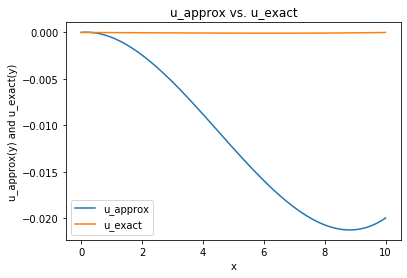

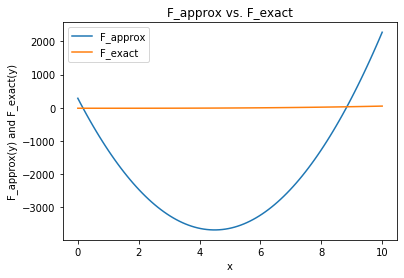

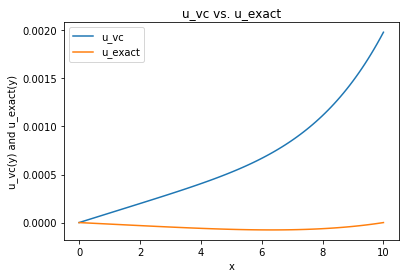

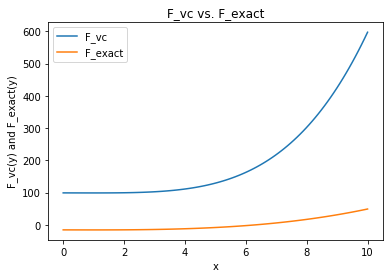

In [48]:
### Problem 7
L = 10
EA = 1*10**6
def u_exact(x):
    return (100 / (EA * L**3)) * ((1/6)*x**4 - x**2 + (L - (1/6)*L**3)*x), 'u_exact'
def F_exact(x):
    return (200 / L**3) * (((1/3)*x**3 - x) + (1/2)*(L-(1/6)*L**3)), 'F_exact'
def u_approx(x):
    return (1/EA) * (284.4642 * x - 882.839*x**2 + 65.489*x**3), 'u_approx'
def F_approx(x):
    return 284.464 - 2*882.839*x + 65.489*3*x**2, 'F_approx'
def u_variationally_consistant(x):
    return (200/(EA*L**3)) * ((1/20)*((x**5)) - .5*(x**2)) + (99/EA)*x , 'u_vc'
def F_variationally_consistant(x):
    return (200/L**3)*(.25*x**4 - x ) +99, 'F_vc'
plot(u_approx,u_exact)
plot(F_approx,F_exact)
plot(u_variationally_consistant,u_exact)
plot(F_variationally_consistant, F_exact)

In [49]:
#### Creating code to double check solutions and output latex equations ####
# problem 5
import sympy as sp
sp.init_printing()
x,L,E,A,P,g = sp.symbols('x,L,E,A,P,g')
F,u = sp.symbols('F,u',cls=sp.Function)
F_x = sp.dsolve(sp.Eq(F(x).diff(x), -g*x**3),F(x),ics={F(0):P})
u_x = sp.dsolve(sp.Eq(E*A*u(x).diff(x,x) + g*x**3),u(x),ics={u(L) : 2,u(x).diff(x,1).subs(x,0) : P/(E*A)})
print(sp.latex(F_x))
print(sp.latex(u_x))

F{\left(x \right)} = P - \frac{g x^{4}}{4}
u{\left(x \right)} = \frac{P x}{A E} - \frac{g x^{5}}{20 A E} + \frac{2 A E + \frac{L^{5} g}{20} - L P}{A E}


In [50]:
# problem 6
f = 200 * ((1-x**3)/L**3)
N_0 = 0
N_i = x**3
F_exact = sp.simplify(sp.integrate(-f,x))
u_exact = ((1 / (E * A)) * sp.integrate(F_exact,x))

print(sp.latex(u_exact))
print(sp.latex(F_exact))

\frac{\frac{10 x^{5}}{L^{3}} - \frac{100 x^{2}}{L^{3}}}{A E}
\frac{50 x \left(x^{3} - 4\right)}{L^{3}}


\frac{5 x^{3} \left(- \frac{200 L^{4}}{7} + 50 L\right)}{9 A E L^{5}}
\frac{5 x^{2} \left(- \frac{200 L^{4}}{7} + 50 L\right)}{3 L^{5}}


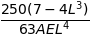

In [51]:
K = E * A * sp.integrate(sp.diff(N_i,x) * sp.diff(N_i,x), (x,0,L))
Q_dist = sp.integrate(f * N_i, (x,0,L))
a = Q_dist / K
u_approx = a * x**3
F_approx = E * A * sp.diff(u_approx,x)
print(sp.latex(u_approx))
print(sp.latex(F_approx))
sp.simplify(a)

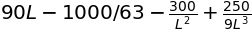

In [52]:
N_i = sp.Matrix([[1],[x],[x**2]])
N_0 = 0
q = sp.zeros(3,1)
q[2] = a
K = E * A * sp.integrate(sp.diff(N_i,x) * sp.diff(N_i.T,x), (x,0,L))
Q_dist = sp.integrate(f * N_i, (x,0,L))
Q_bc = K*q - Q_dist
F_L = Q_bc[1] / L
F_0 = Q_bc[0] + F_L
sp.simplify(F_0)

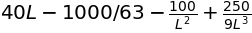

In [53]:
sp.simplify(F_L)

In [54]:
F_x = 90*(L - x) - (1000/63) - (300/L**2) + 250/(9*L**3)
u_x = (1/(E*A)) * sp.integrate(F_x,x)
print(u_x)

(-45.0*x**2 + 0.111111111111111*x*(810.0*L**4 - 142.857142857143*L**3 - 2700.0*L + 250.0)/L**3)/(A*E)


In [55]:
import sympy.matrices as sm
L,EA = sp.symbols('L,EA')
K = EA * sp.Matrix([[(-2/3)*L**3,(1/2)*L**3 - (2/3)* L**4],[(1/2)*L**3 - (2/3)*L**4, 3*L**3 - 3*L**4]])
Q_dist = 200 * sp.Matrix([[-1/6 + (1/30) * L**3],[(-1/4)*L + (2/35)*L**4]])
a = K.inv() * Q_dist
sp.simplify(a.subs(L,10))
print(sp.latex(a.subs(L,10)))


\left[\begin{matrix}- \frac{26.0926887259758}{EA}\\\frac{1.74515553794333}{EA}\end{matrix}\right]


In [56]:
L = 10
a_1 = (9/20) * L**4 - (3/2)*L
a_2 = (9 * L**4) / 20 - 1.5*L
print(a_1,a_2)

4485.0 4485.0


In [57]:
L = 10
EA = 1*10**6
K = np.array([
    [0,0,0,0],
    [0,L,L**2,L**3],
    [0,L**2,(4*L**3)/3,(3*L**4)/2],
    [0,L**3,(3*L**4)/2,(9*L**5)/5]
])
a = (1/EA) * np.array([
    [0],
    [26.093*L - 1.7452 * L**2],
    [-26.093],
    [1.7452]
])
Q_dist = (200/L**3) * np.array([
    [L - .25*L**4],
    [.5*L**2 - .2*L**5],
    [(L**3)/3 - (L**6)/6],
    [(L**4)/4-(L**7)/7]
])
print(np.matmul(K,a))
Q_bc = (np.matmul(K,a) - Q_dist)
#q = np.matmul(np.linalg.inv(K),(Q_bc + Q_dist))
print(np.linalg.det(K))

[[0.00000000e+00]
 [4.33680869e-19]
 [2.83333333e-05]
 [9.15100000e-03]]
0.0


In [58]:
L = sp.symbols('L')
K = sp.Matrix([[L,L**2],[L**2, 4*L**3 / 3]])
q = sp.Matrix([[L**2 / 2 - L**5 / 5],[L**3 / 3 - L**6 / 6]])
j = K.inv() * q
K = sp.Matrix([[0,0,0],[0,L,L**2],[0,L**2,4*L**3 / 3]])
a = sp.Matrix([0,-2990,199/2])
Q_dist = sp.Matrix([[L - L**3 / 3],[L**2 / 2 - L**5 / 5],[L**3 / 3 - L**6 / 6]])
i = K*a - Q_dist
i.subs(L,10)

⎡        970/3        ⎤
⎢                     ⎥
⎢          0          ⎥
⎢                     ⎥
⎣-2.91038304567337e-11⎦

In [59]:
K = sp.Matrix([[L,L**2,L**3],[L**2,4*L**3/3,3*L**4/2],[L**2,3*L**4/2,9*L**5/5]])
Q_dist = sp.Matrix([[L**2/2-L**5/5],[L**3/3-L**6/6],[L**4/4 - L**7/7]])
a1,a2,a3,a4 = sp.symbols('a1,a2,a3,a4')
a = sp.Matrix([a2,a3,a4])
F_L,F_0,EA = sp.symbols('F_L,F_0,EA')
Q_bc = sp.Matrix([[L*F_L],[L**2*F_L],[L**3*F_L]])
a = K.inv() * (Q_dist + Q_bc)
print(a.subs(F_L,0))

Matrix([[L**7*(-L**7/7 + L**4/4)/(6*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3)) + 3*(-L**5/5 + L**2/2)*(L**7*(-L**6/3 + L**2*(3*L**5/2 - L**4))/6 + 4*L**4*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3)/3)/(L**5*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3)) + 3*(-L**6/6 + L**3/3)*(-L**8*(3*L**5/2 - L**4)/6 - L**3*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3))/(L**5*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3))], [-L**6*(-L**7/7 + L**4/4)/(2*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3)) + 3*(-L**5/5 + L**2/2)*(-L**5*(-L**6/3 + L**2*(3*L**5/2 - L**4))/2 - L**2*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3))/(L**4*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3)) + 3*(-L**6/6 + L**3/3)*(L**6*(3*L**5/2 - L**4)/2 + L*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3))/(L**4*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3))], [L**5*(-L**7/7 + L**4/4)/(3*(-L**5*(3*L**5/2 - L**4)/2 + L**4*(9*L**6/5 - L**5)/3)) - 

In [60]:
K = EA * sp.Matrix([[0,0,0,0],[0,L,L**2,L**3],[0,L**2,4*L**3/3,3*L**4/2],[0,L**2,3*L**4/2,9*L**5/5]])
a = sp.Matrix([[0],[284.464285714284], [-882.839285714285], [65.4892857142856]])
Q_dist = (200/(L**3)) * sp.Matrix([[L-L**4/4],[L**2/2-L**5/5],[L**3/3-L**6/6],[L**4/4 - L**7/7]])
j = K*a - Q_dist
print(498-399)

99
